## MDS Thesis
#### 03. Visualize results

<br>
<hr style="opacity: 0.5">

### Setup

In [70]:
# had to install statsmodels this way
#!/Users/varvarailyina/hertie/mds_thesis/env/bin/python -m pip install statsmodels

In [71]:
# load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [72]:
# set wd
os.chdir("/Users/varvarailyina/hertie/mds_thesis")

-- *Load data*

In [103]:
# load clean data
df_clean = pd.read_csv('./data/out/df_clean.csv')

-- *Clean `month` column*

In [104]:
# convert to string and remove trailing '.0'
df_clean['month'] = df_clean['month'].astype(str).str.replace('.0', '', regex=False)

# pad to 4 characters just in case (e.g., '907' → '0907')
df_clean['month'] = df_clean['month'].str.zfill(4)

# convert to datetime (adds '20' prefix to turn '1307' → '2013-07-01')
df_clean['month_dt'] = pd.to_datetime('20' + df_clean['month'], format='%Y%m')

-- *Clean `date` column*

In [105]:
# strip time from `date` and convert to a string
df_clean['date'] = pd.to_datetime(df_clean['date']).dt.date
df_clean['date'] = df_clean['date'].astype(str)

# set `date` as datetime without time
#df_clean['date'] = pd.to_datetime(df_clean['date']).dt.normalize()

-- *Clean df for plotting emotion shares*

In [122]:
# define columns with emotion shares
emotion_share_cols = [col for col in df_clean.columns if col.endswith('_share')]

# melt df for plotting
df_shares = df_clean.melt(
    id_vars=['party'],
    value_vars=emotion_share_cols,
    var_name='emotion',
    value_name='value'
)

# clean emotion labels
df_shares['emotion'] = df_shares['emotion'].str.replace('_share', '').str.title()

-- *Specify things*

In [106]:
# specify emotion columns
emotion_cols = ['anger', 'fear', 'disgust', 'sadness', 'joy', 'enthusiasm', 'pride', 'hope']

In [149]:
# define party colors
party_colors = {
    'CDU/CSU': '#000000',
    'SPD': '#E3000F',
    'Greens': '#46962B',
    'FDP': '#FFED00',
    'Left': '#8C3473',
    'AfD': '#009EE0'
}

# define emotion colors
emotion_colors = {
    #'anger': '#b2182b',
    'anger': '#e66101',
    'fear': '#5e3c99',
    'disgust': '#1b7837',
    'sadness': '#2166ac',
    'joy': '#fdb863',
    'enthusiasm': '#b2abd2',
    'pride': '#d01c8b',
    'hope': '#80cdc1'
}

In [142]:
# alternative emotion colors
emotion_colors = {
    'anger': '#b2182b',
    'fear': '#2166ac',
    'disgust': '#1a9850',
    'sadness': '#762a83',
    'joy': '#fdb863',
    'enthusiasm': '#80cdc1',
    'pride': '#e66101',
    'hope': '#c7e9b4'
}

<hr style="opacity: 0.25">

### Visualize results (emotional intensity)

-- *Emotional intensity by party*

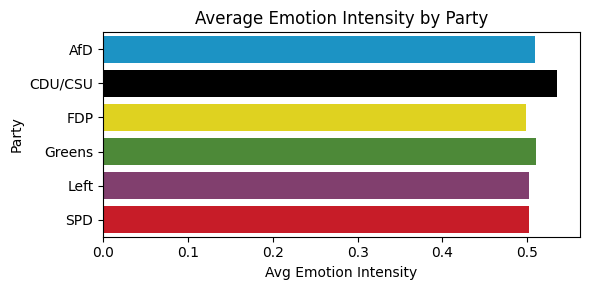

In [108]:
# average emotion intensity by party
plt.figure(figsize=(6, 3))
sns.barplot(
    data=df_clean,
    x='emotion_intensity',
    y='party',
    hue='party',
    dodge=False,
    estimator=np.mean,
    errorbar=None,
    palette=party_colors,
    legend=False
)
plt.title('Average Emotion Intensity by Party')
plt.xlabel('Avg Emotion Intensity')
plt.ylabel('Party')
plt.tight_layout()
plt.show()

-- *Most emotional press releases*

In [173]:
# top 10 most emotional press releases
top_emotional = df_clean.sort_values(by='emotion_intensity', ascending=False).head(10)

# truncate text for display
top_emotional['text'] = top_emotional['text'].str[:100] + '...'

# print preview
print(top_emotional[['party', 'date', 'emotion_intensity', 'text']])

        party       date  emotion_intensity  \
227       AfD 2017-07-07           3.500000   
5818     Left 2014-11-03           3.500000   
1460  CDU/CSU 2014-09-03           3.285714   
7379      SPD 2012-08-13           3.200000   
301       AfD 2018-02-21           3.125000   
5861     Left 2015-01-08           3.000000   
6033     Left 2015-11-14           3.000000   
4820     Left 2010-07-21           3.000000   
6382     Left 2017-12-18           3.000000   
2684      FDP 2014-07-10           3.000000   

                                                   text  
227   Der Spitzenkandidat der Af D, Alexander Gaulan...  
5818  „Die Bundesregierung muss Schluss machen mit S...  
1460  „Die Veröffentlichung eines Hinrichtungsvideos...  
7379  Zur Situation in der Türkei, erklärt die stell...  
301   Zum heutigen Welttag der sozialen Gerechtigkei...  
5861  Ich bin zutiefst erschüttert über das Massaker...  
6033  Zu den Terroranschlägen in Paris erklären die ...  
4820  „Die Reform 

In [174]:
top_emotional

party       date      month  issue_mono  \
227       AfD 2017-07-07 2017-07-01       191.0   
5818     Left 2014-11-03 2014-11-01         7.0   
1460  CDU/CSU 2014-09-03 2014-09-01       191.0   
7379      SPD 2012-08-13 2012-08-01       191.0   
301       AfD 2018-02-21 2018-02-01        13.0   
5861     Left 2015-01-08 2015-01-01         2.0   
6033     Left 2015-11-14 2015-11-01       191.0   
4820     Left 2010-07-21 2010-07-01        16.0   
6382     Left 2017-12-18 2017-12-01       191.0   
2684      FDP 2014-07-10 2014-07-01        16.0   

                                                   text  anger  fear  disgust  \
227   Der Spitzenkandidat der Af D, Alexander Gaulan...    3.0   3.0      1.0   
5818  „Die Bundesregierung muss Schluss machen mit S...    7.0   6.0      3.0   
1460  „Die Veröffentlichung eines Hinrichtungsvideos...    6.0   4.0      4.0   
7379  Zur Situation in der Türkei, erklärt die stell...    5.0   4.0      1.0   
301   Zum heutigen Welttag der sozialen Gerechtigkei...    6.0   4.0      6.0   
5861  Ich bin zutiefst erschüttert über das Massaker...    7.0   6.0      4.0   
6033  Zu den Terroranschlägen in Paris erklären die ...    6.0   7.0      2.0   
4820  „Die Reform der Bundeswehr wird vom falschen E...    6.0   5.0      2.0   
6382  „Die Bundesregierung muss sich endlich besinne...   12.0   7.0      4.0   
2684  Zu den Äußerungen des Bundesinnenministers, di...    3.0   2.0      0.0   

      sadness  joy  ...  fear_share  disgust_share  sadness_share  joy_share  \
227       3.0  0.0  ...       21.43           7.14          21.43       0.00   
5818      4.0  1.0  ...       17.14           8.57          11.43       2.86   
1460      5.0  0.0  ...       17.39          17.39          21.74       0.00   
7379      4.0  0.0  ...       25.00           6.25          25.00       0.00   
301       7.0  0.0  ...       16.00          24.00          28.00       0.00   
5861      5.0  0.0  ...       20.00          13.33          16.67       0.00   
6033      3.0  0.0  ...       25.93           7.41          11.11       0.00   
4820      6.0  0.0  ...       23.81           9.52          28.57       0.00   
6382      7.0  0.0  ...       19.44          11.11          19.44       0.00   
2684      2.0  1.0  ...       11.11           0.00          11.11       5.56   

      enthusiasm_share  pride_share  hope_share  n_words   month_dt    quarter  
227              14.29         0.00       14.29      163 2017-07-01 2017-07-01  
5818             14.29         8.57       17.14      227 2014-11-01 2014-10-01  
1460              4.35         4.35        8.70      186 2014-09-01 2014-07-01  
7379              6.25         0.00        6.25      117 2012-08-01 2012-07-01  
301               4.00         0.00        4.00      176 2018-02-01 2018-01-01  
5861             13.33         0.00       13.33      207 2015-01-01 2015-01-01  
6033             14.81         0.00       18.52      164 2015-11-01 2015-10-01  
4820              4.76         0.00        4.76      223 2010-07-01 2010-07-01  
6382              5.56         0.00       11.11      309 2017-12-01 2017-10-01  
2684             22.22        11.11       22.22      160 2014-07-01 2014-07-01  

[10 rows x 35 columns]

<hr style="opacity: 0.25">

### Visualize results (total emotions)

-- *Total mentions of each emotion across all press releases*

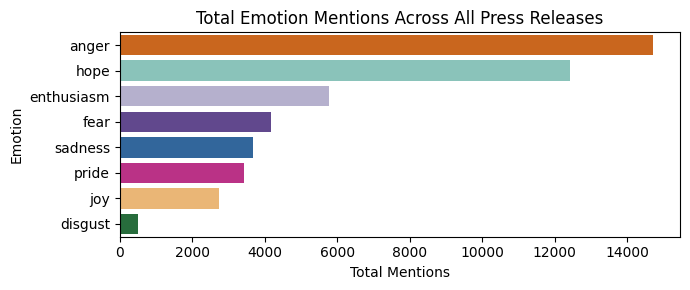

In [150]:
# convert emotion totals to df
emotion_totals = df_clean[emotion_cols].sum().sort_values(ascending=False)
emotion_df = emotion_totals.reset_index()
emotion_df.columns = ['emotion', 'total_mentions']

# plot
plt.figure(figsize=(7, 3))
sns.barplot(
    data=emotion_df,
    x='total_mentions',
    y='emotion',
    hue='emotion',
    dodge=False,
    palette=emotion_colors,
    legend=False
)
plt.title('Total Emotion Mentions Across All Press Releases')
plt.xlabel('Total Mentions')
plt.ylabel('Emotion')
plt.tight_layout()
plt.show()

-- *Distribution of total emotions across parties*

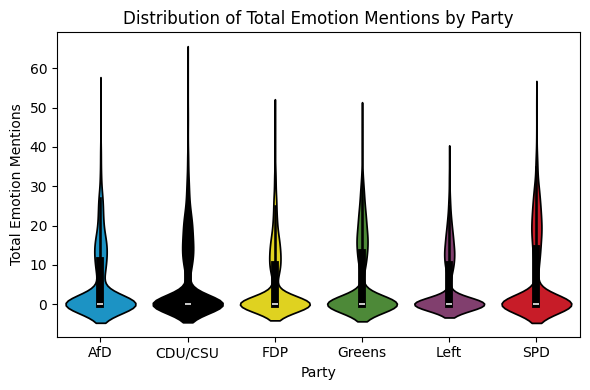

In [113]:
# violin plot
plt.figure(figsize=(6, 4))
sns.violinplot(
    data=df_clean,
    x='party',
    y='total_emotion_mentions',
    hue='party',
    palette=party_colors,
    inner='box',
    dodge=False,
    legend=False
)
plt.title('Distribution of Total Emotion Mentions by Party')
plt.xlabel('Party')
plt.ylabel('Total Emotion Mentions')
plt.tight_layout()
plt.show()

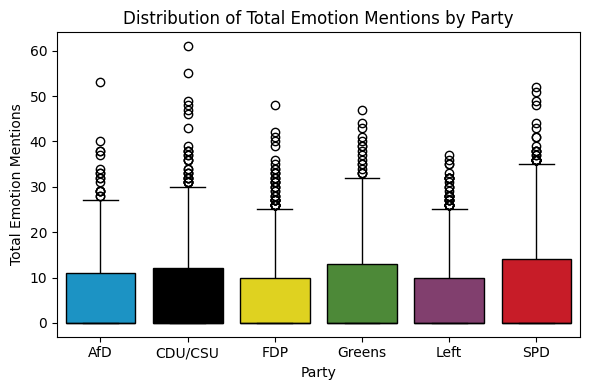

In [111]:
# box plot
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df_clean,
    x='party',
    y='total_emotion_mentions',
    hue='party',
    palette=party_colors,
    dodge=False,
    legend=False
)
plt.title('Distribution of Total Emotion Mentions by Party')
plt.xlabel('Party')
plt.ylabel('Total Emotion Mentions')
plt.tight_layout()
plt.show()

<hr style="opacity: 0.25">

### Visualize results (emotion shares)

-- *Barplot of average emotion shares by party*

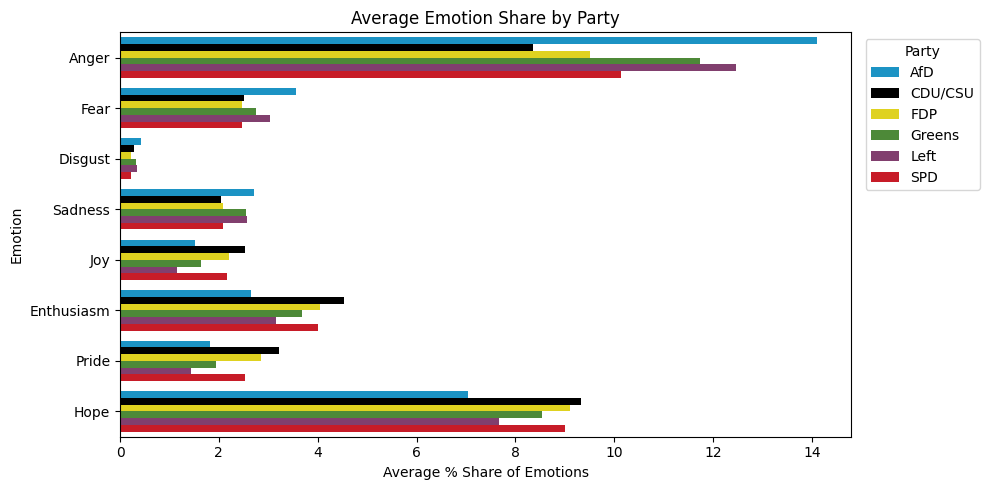

In [163]:
# share of each emotion by party
plt.figure(figsize=(10, 5))
sns.barplot(data=df_shares, x='value', y='emotion', hue='party', palette=party_colors, errorbar=None)
plt.title('Average Emotion Share by Party')
plt.xlabel('Average % Share of Emotions')
plt.ylabel('Emotion')
plt.legend(title='Party', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

-- *Distribution of each emotion across parties*

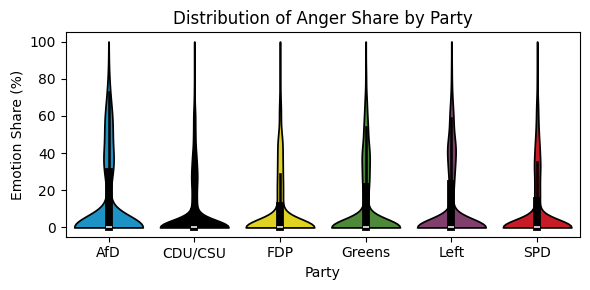

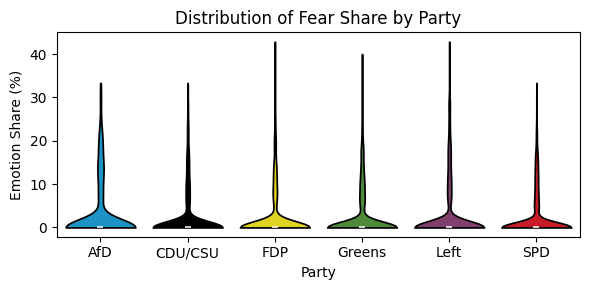

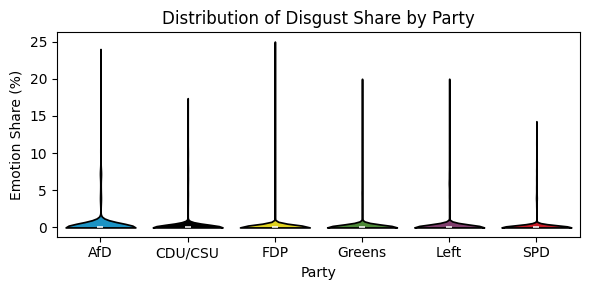

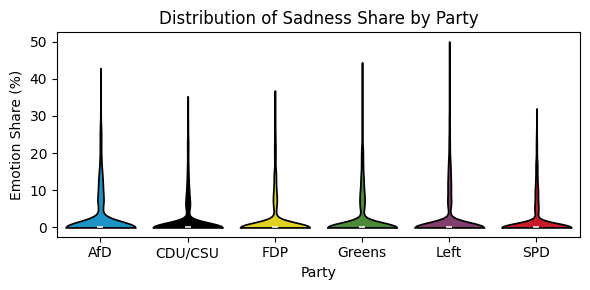

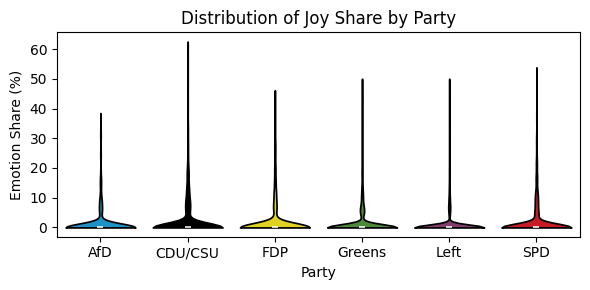

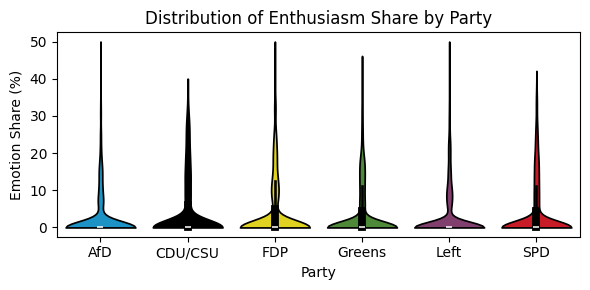

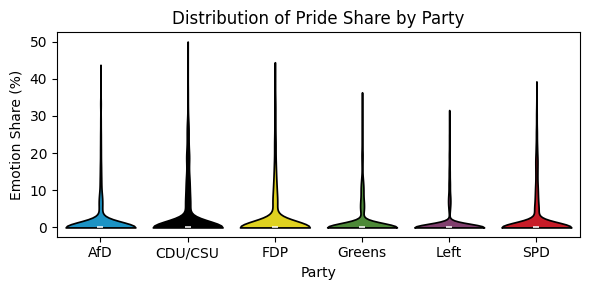

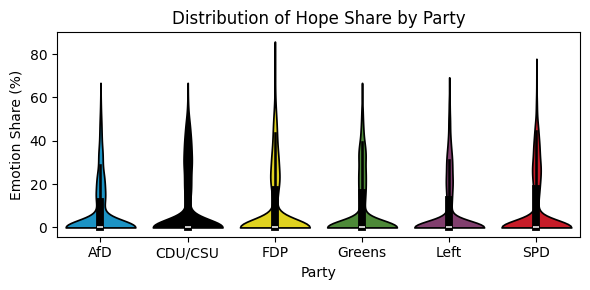

In [121]:
# loop over each emotion for violin plots by party
for emotion in df_shares['emotion'].unique():
    plt.figure(figsize=(6, 3))
    sns.violinplot(
    data=df_shares[df_shares['emotion'] == emotion],
    x='party',
    y='value',
    hue='party',
    palette=party_colors,
    inner='box',
    cut=0,
    dodge=False,
    legend=False
)
    plt.title(f'Distribution of {emotion} Share by Party')
    plt.xlabel('Party')
    plt.ylabel('Emotion Share (%)')
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

-- *Stacked area plot of emotion share by party over time*

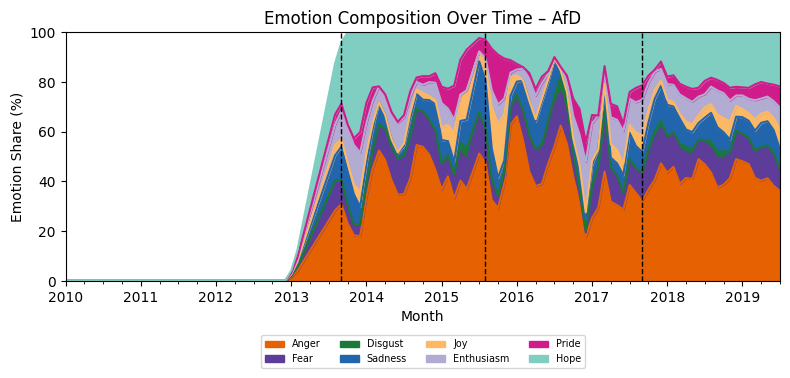

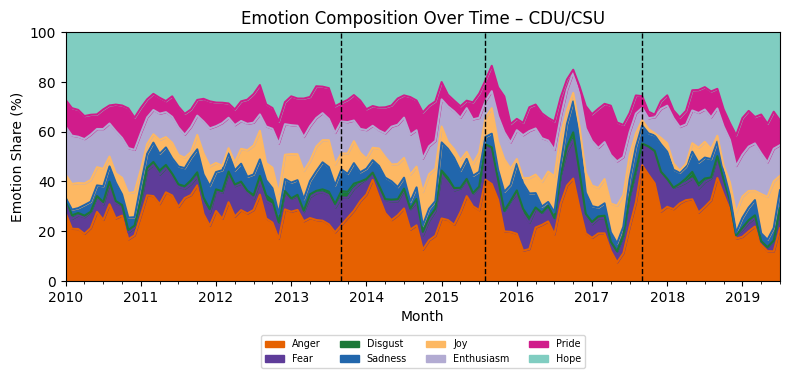

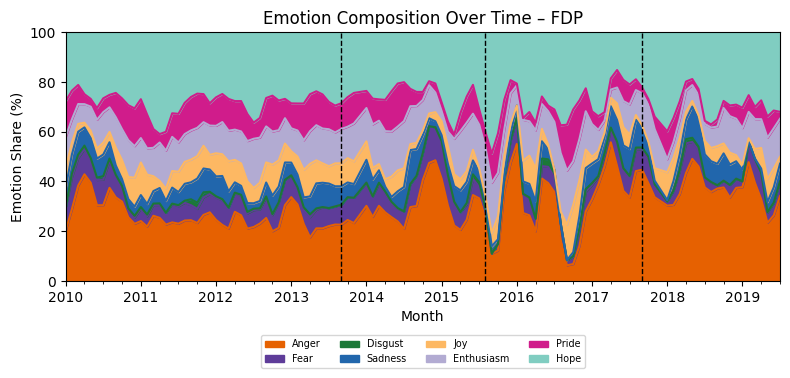

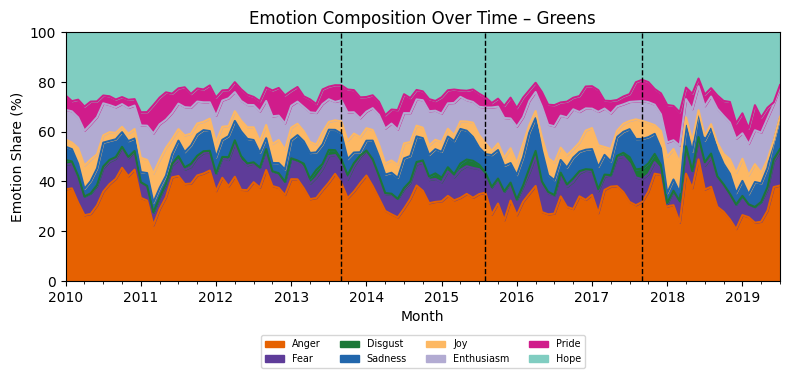

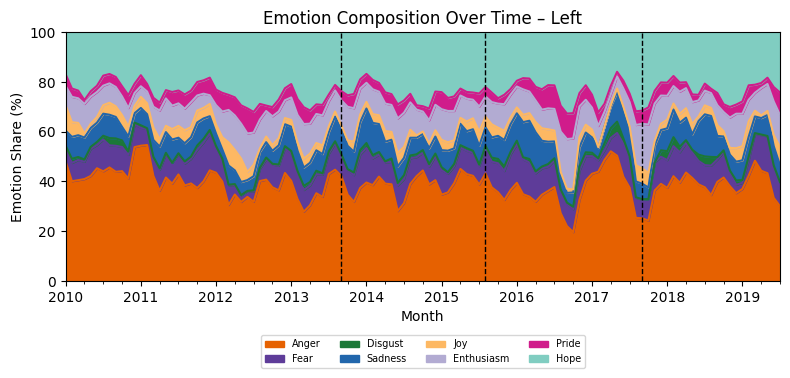

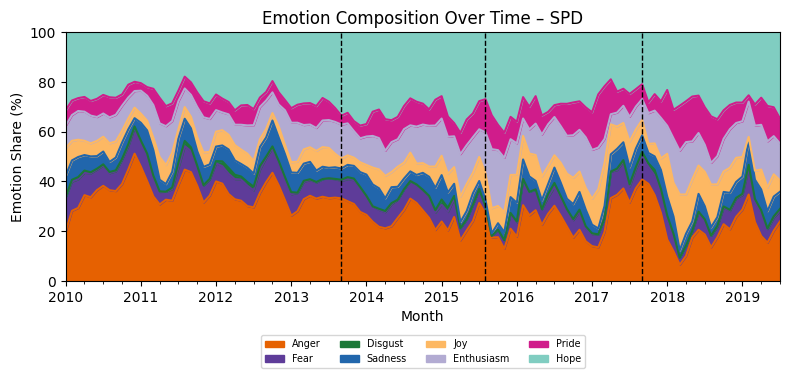

In [193]:
# reorder columns by color palette
emotion_order = list(emotion_colors.keys())
share_cols_ordered = [f"{emotion}_share" for emotion in emotion_order]

# ensure datetime format for month
df_clean['month'] = pd.to_datetime(df_clean['date']).dt.to_period('M').dt.to_timestamp()

# full timeline index
full_month_index = pd.date_range(start='2010-01-01', end=df_clean['month'].max(), freq='MS')

# important events
election_2013 = pd.to_datetime('2013-09-22')
election_2017 = pd.to_datetime('2017-09-24')
merkel_press_conf = pd.to_datetime('2015-08-31')
event_dates = [election_2013, merkel_press_conf, election_2017]
#event_labels = ["2013 Election", "Merkel: 'Wir schaffen das!'", "2017 Election"]

# plot by party
for party in df_clean['party'].unique():
    df_party = df_clean[df_clean['party'] == party]

    # group and average monthly emotion shares
    df_grouped = df_party.groupby('month')[share_cols_ordered].mean()

    # normalize to make shares sum to 100% (just emotions)
    df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

    # reindex to full timeline
    df_grouped = df_grouped.reindex(full_month_index)

    # fill pre-founding months (AfD before 2013) with zeros
    if party == "AfD":
        founding_date = pd.to_datetime("2013-01-01")
        df_grouped.loc[df_grouped.index < founding_date] = 0

    # interpolate and smooth
    df_grouped = df_grouped.interpolate(method='linear', limit_direction='both')
    df_grouped = df_grouped.rolling(window=3, min_periods=1).mean()

    # plot
    plt.figure(figsize=(8, 4))
    df_grouped.plot(
        kind='area',
        stacked=True,
        ax=plt.gca(),
        color=[emotion_colors[e] for e in emotion_order]
    )

    # add event markers
    #for date, label in zip(event_dates, event_labels):
    for date in event_dates:
        plt.axvline(date, color='black', linestyle='--', linewidth=1)
        #plt.text(date, 102, label, rotation=90, verticalalignment='bottom', fontsize=8)
    
    plt.title(f"Emotion Composition Over Time – {party}")
    plt.xlabel("Month")
    plt.ylabel("Emotion Share (%)")
    plt.ylim(0, 100)

    # grab handles and labels generated by matplotlib
    handles, labels = plt.gca().get_legend_handles_labels()

    # manually relabel without breaking color patch sizes
    new_labels = [label.replace('_share', '').title() for label in labels]

    # use in the legend
    plt.legend(
        handles=handles,
        labels=new_labels,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.2),
        ncol=4,
        fontsize='x-small'
    )
    plt.tight_layout()
    plt.show()

-- *Stacked area plot of emotion share by party over time for each party's top issue*

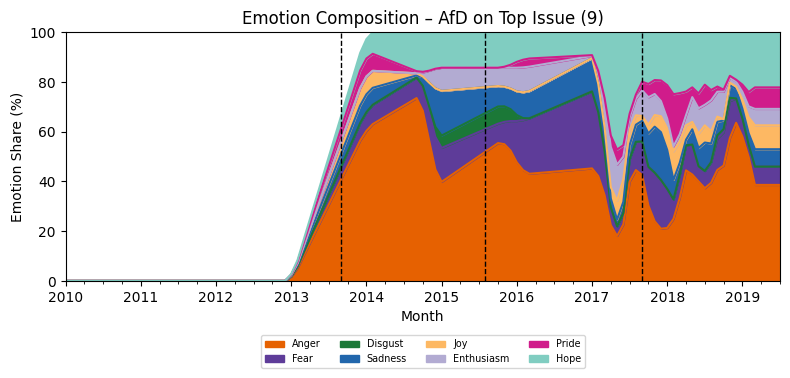

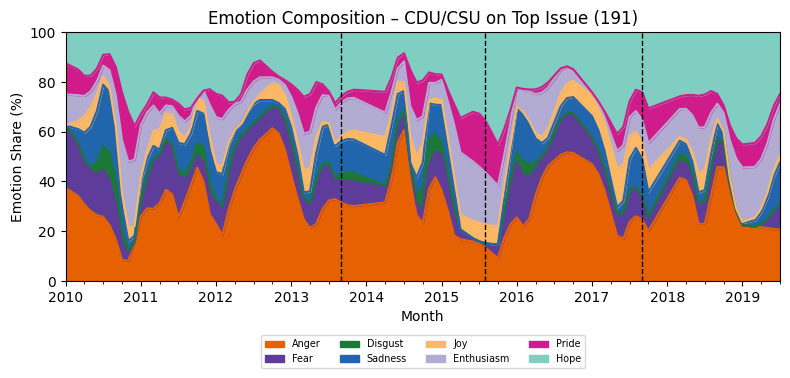

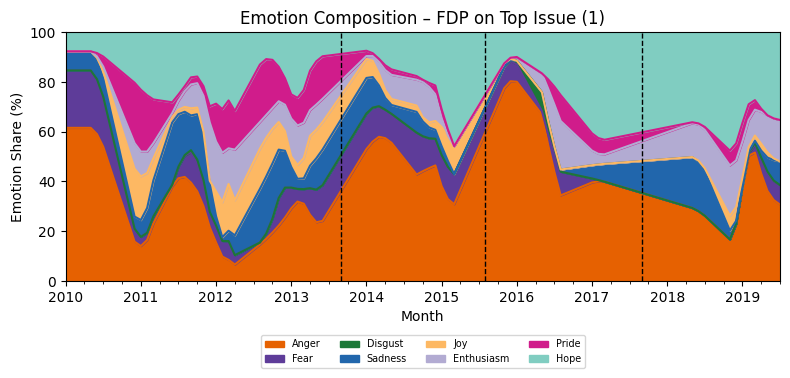

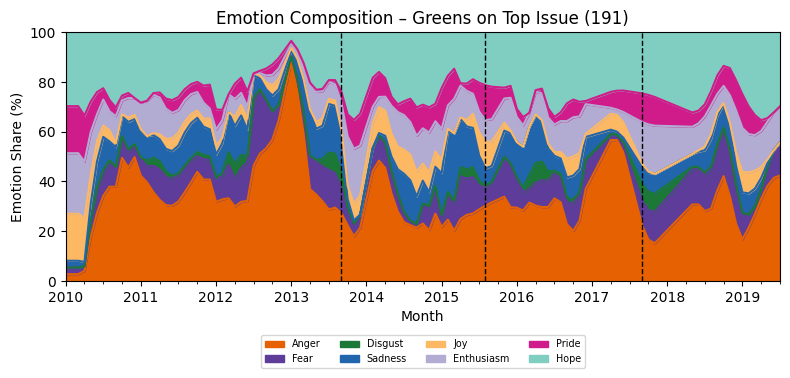

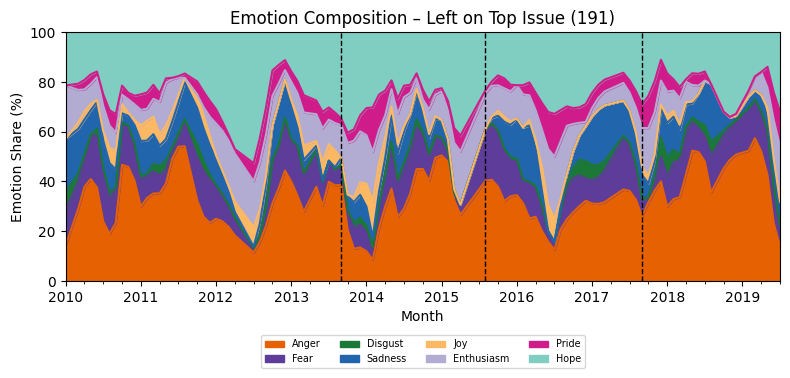

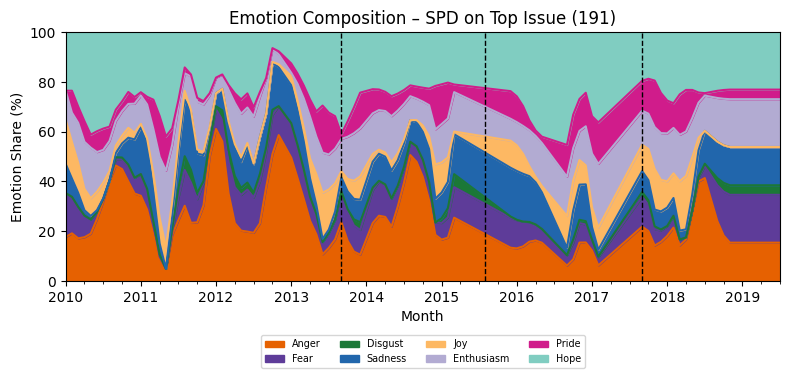

In [196]:
# identify top issue per party
top_issues_per_party = (
    df_clean.groupby(['party', 'issue_mono'])
    .size()
    .reset_index(name='n_press_releases')
    .sort_values(['party', 'n_press_releases'], ascending=[True, False])
    .groupby('party')
    .first()
    .reset_index()
)

# filter `df_clean` for only each party's top issue
df_top_issues = pd.merge(df_clean, top_issues_per_party[['party', 'issue_mono']], on=['party', 'issue_mono'])

# prepare color and column info
emotion_order = list(emotion_colors.keys())
share_cols_ordered = [f"{emotion}_share" for emotion in emotion_order]

# ensure datetime format for month
df_top_issues['month'] = pd.to_datetime(df_top_issues['date']).dt.to_period('M').dt.to_timestamp()
full_month_index = pd.date_range(start='2010-01-01', end=df_top_issues['month'].max(), freq='MS')

# event dates
election_2013 = pd.to_datetime('2013-09-22')
election_2017 = pd.to_datetime('2017-09-24')
merkel_press_conf = pd.to_datetime('2015-08-31')
event_dates = [election_2013, merkel_press_conf, election_2017]

# plot for each party
for party in df_top_issues['party'].unique():
    df_party = df_top_issues[df_top_issues['party'] == party].copy()
    issue_label = df_party['issue_mono'].iloc[0]

    df_grouped = df_party.groupby('month')[share_cols_ordered].mean()
    df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100
    df_grouped = df_grouped.reindex(full_month_index)

    if party == "AfD":
        founding_date = pd.to_datetime("2013-01-01")
        df_grouped.loc[df_grouped.index < founding_date] = 0

    df_grouped = df_grouped.interpolate(method='linear', limit_direction='both')
    df_grouped = df_grouped.rolling(window=3, min_periods=1).mean()

    # plot
    plt.figure(figsize=(8, 4))
    df_grouped.plot(
        kind='area',
        stacked=True,
        ax=plt.gca(),
        color=[emotion_colors[e] for e in emotion_order]
    )

    for date in event_dates:
        plt.axvline(date, color='black', linestyle='--', linewidth=1)

    plt.title(f"Emotion Composition – {party} on Top Issue ({int(issue_label)})")
    plt.xlabel("Month")
    plt.ylabel("Emotion Share (%)")
    plt.ylim(0, 100)

    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = [label.replace('_share', '').title() for label in labels]
    plt.legend(
        handles=handles,
        labels=new_labels,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.2),
        ncol=4,
        fontsize='x-small'
    )

    plt.tight_layout()
    plt.show()

-- *Stacked area plot of emotion share by party over time for each party's top 3 issues*

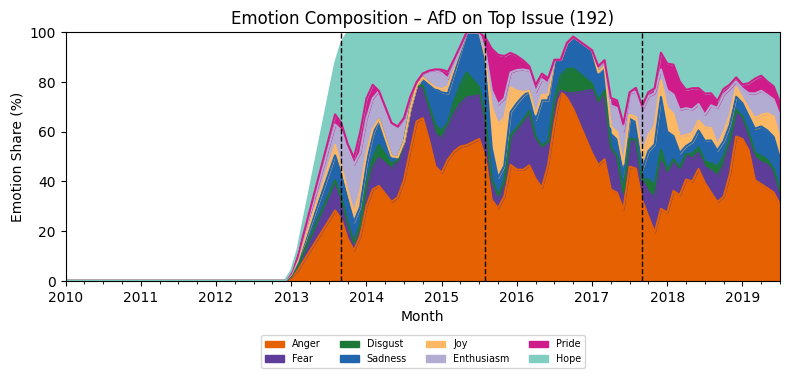

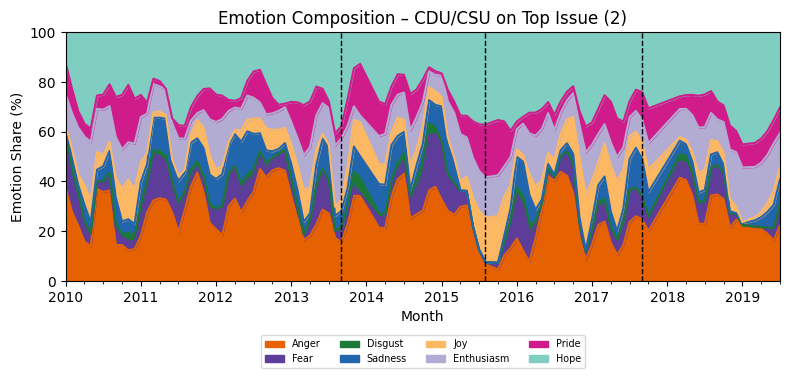

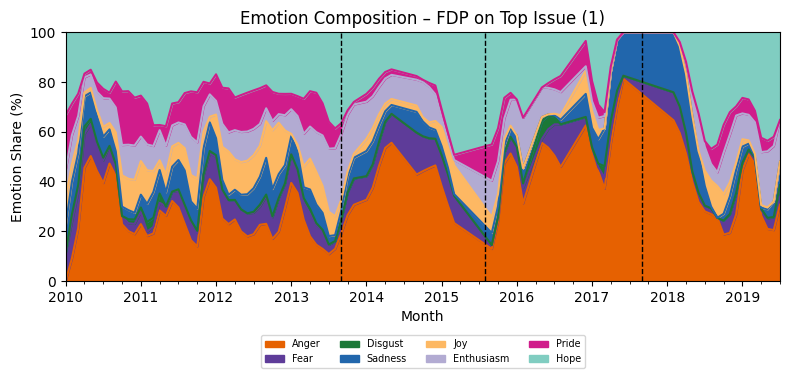

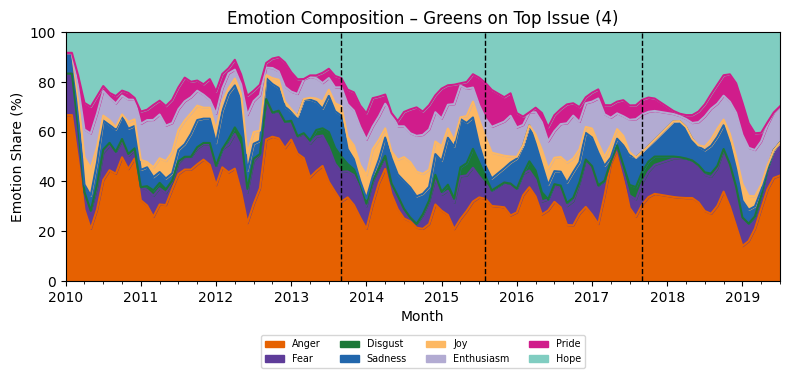

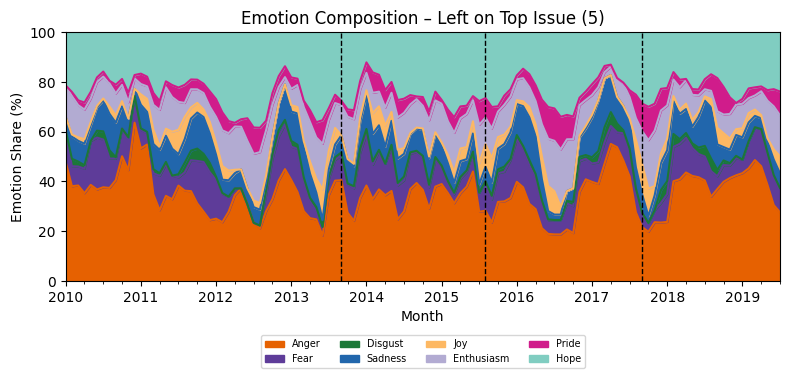

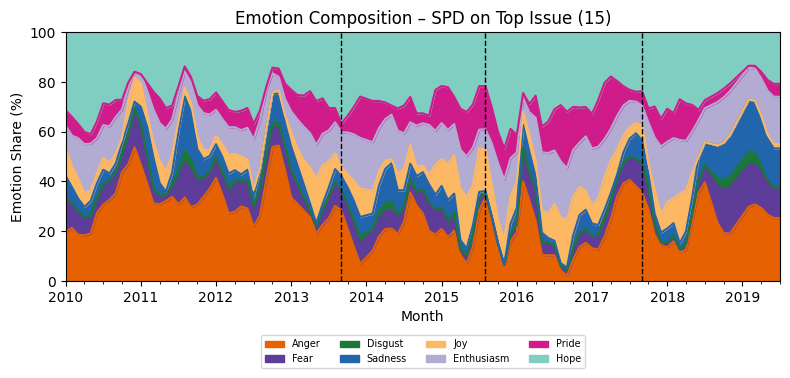

In [197]:
# get top 3 issues per party
top_issues_per_party = (
    df_clean.groupby(['party', 'issue_mono'])
    .size()
    .reset_index(name='n_press_releases')
    .sort_values(['party', 'n_press_releases'], ascending=[True, False])
    .groupby('party')
    .head(3)
)

# filter `df_clean` to only these rows
df_top_issues = df_clean.merge(top_issues_per_party[['party', 'issue_mono']], on=['party', 'issue_mono'])

# prepare color and column info
emotion_order = list(emotion_colors.keys())
share_cols_ordered = [f"{emotion}_share" for emotion in emotion_order]

# ensure datetime format for month
df_top_issues['month'] = pd.to_datetime(df_top_issues['date']).dt.to_period('M').dt.to_timestamp()
full_month_index = pd.date_range(start='2010-01-01', end=df_top_issues['month'].max(), freq='MS')

# event dates
election_2013 = pd.to_datetime('2013-09-22')
election_2017 = pd.to_datetime('2017-09-24')
merkel_press_conf = pd.to_datetime('2015-08-31')
event_dates = [election_2013, merkel_press_conf, election_2017]

# plot for each party
for party in df_top_issues['party'].unique():
    df_party = df_top_issues[df_top_issues['party'] == party].copy()
    issue_label = df_party['issue_mono'].iloc[0]

    df_grouped = df_party.groupby('month')[share_cols_ordered].mean()
    df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100
    df_grouped = df_grouped.reindex(full_month_index)

    if party == "AfD":
        founding_date = pd.to_datetime("2013-01-01")
        df_grouped.loc[df_grouped.index < founding_date] = 0

    df_grouped = df_grouped.interpolate(method='linear', limit_direction='both')
    df_grouped = df_grouped.rolling(window=3, min_periods=1).mean()

    # plot
    plt.figure(figsize=(8, 4))
    df_grouped.plot(
        kind='area',
        stacked=True,
        ax=plt.gca(),
        color=[emotion_colors[e] for e in emotion_order]
    )

    for date in event_dates:
        plt.axvline(date, color='black', linestyle='--', linewidth=1)

    plt.title(f"Emotion Composition – {party} on Top Issue ({int(issue_label)})")
    plt.xlabel("Month")
    plt.ylabel("Emotion Share (%)")
    plt.ylim(0, 100)

    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = [label.replace('_share', '').title() for label in labels]
    plt.legend(
        handles=handles,
        labels=new_labels,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.2),
        ncol=4,
        fontsize='x-small'
    )

    plt.tight_layout()
    plt.show()

<hr style="opacity: 0.25">

### Visualize results (normalized emotions)

-- *Distribution of each (normalized) emotion over time*

In [ ]:
# melt normalized emotion columns
emotion_cols_norm = [col + '_norm' for col in emotion_cols]

df_melted = df_clean.melt(
    id_vars=['month_dt'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted['emotion'] = df_melted['emotion'].str.replace('_norm', '')

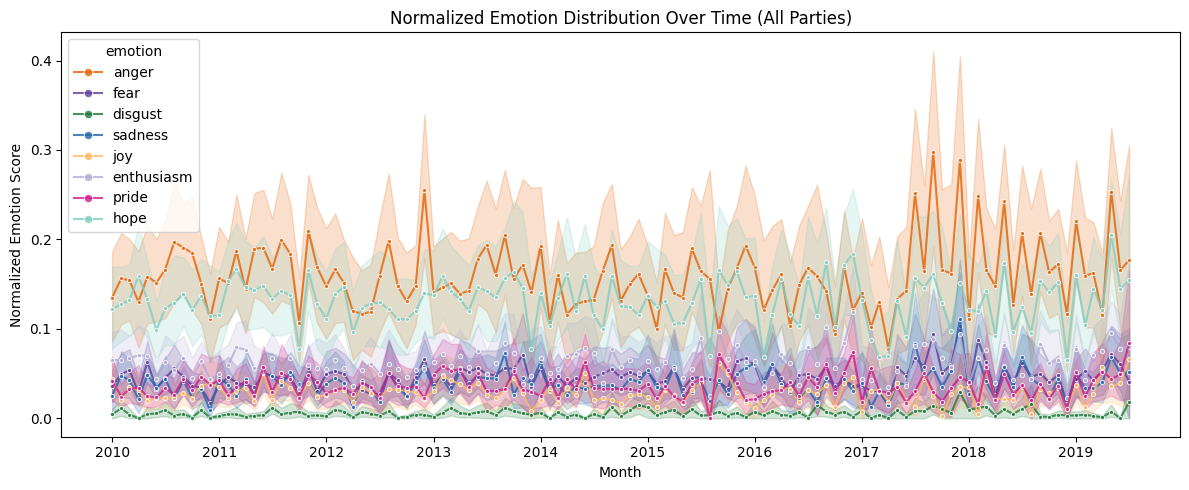

-- *Line plot of each emotion by party over time (monthly)*

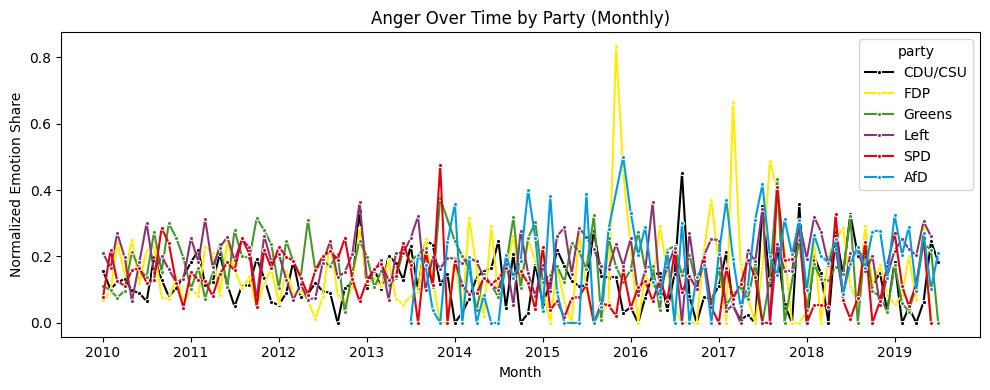

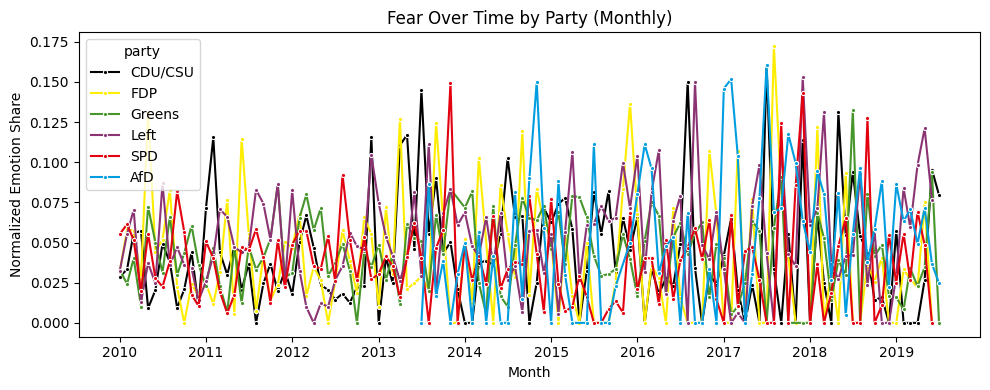

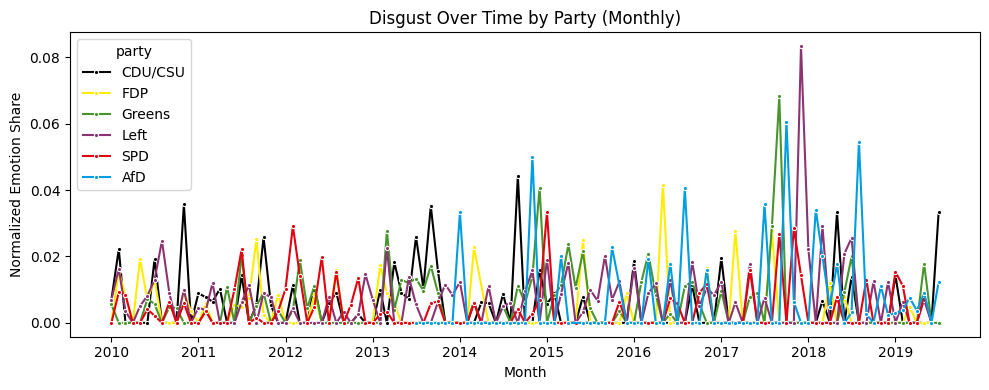

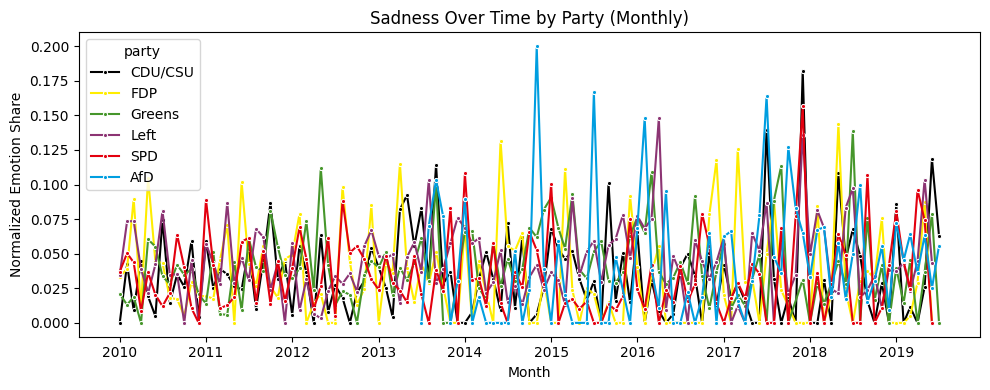

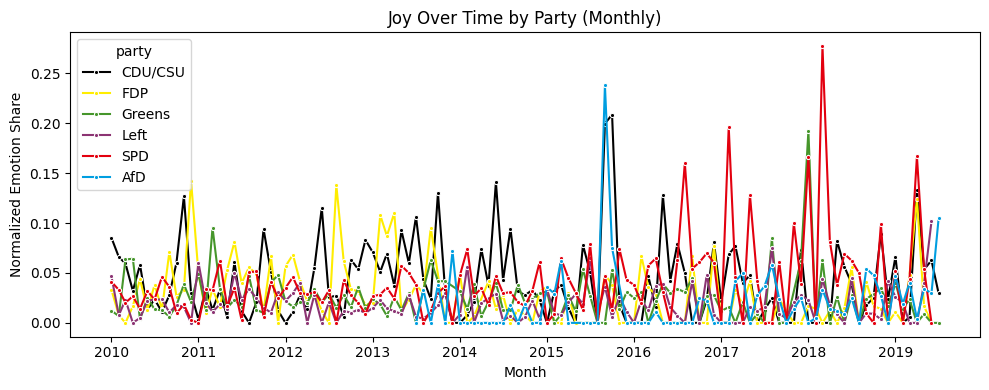

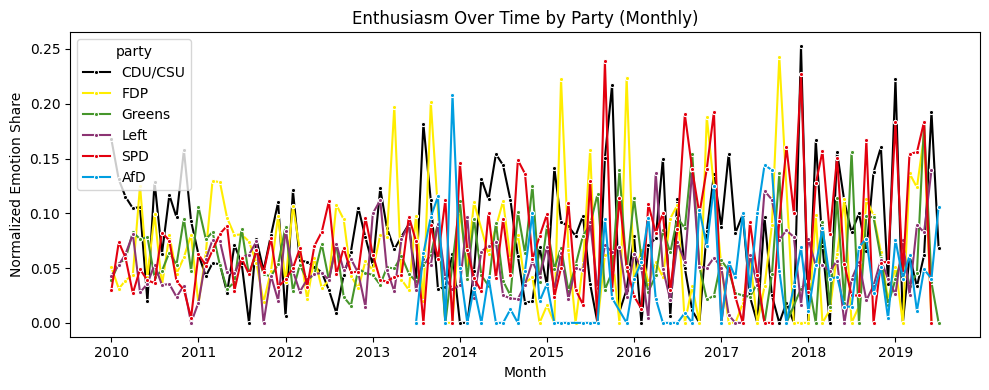

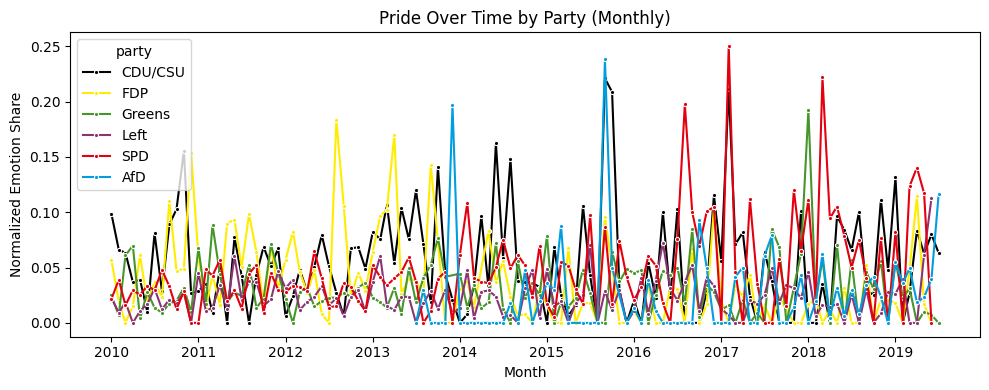

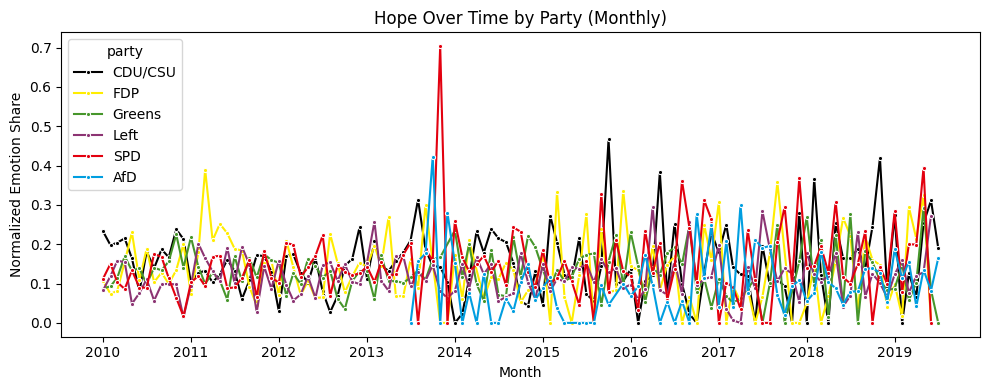

In [ ]:
# Convert date and create month column
df_clean['month'] = pd.to_datetime(df_clean['date']).dt.to_period('M').dt.to_timestamp()

# Melt emotion columns
df_melted_month = df_clean.melt(
    id_vars=['month', 'party'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_month['emotion'] = df_melted_month['emotion'].str.replace('_norm', '')

# Group by month, party, emotion
df_monthly = df_melted_month.groupby(['month', 'party', 'emotion'])['value'].mean().reset_index()

# Plot each emotion over time by party
for emotion in emotion_cols:
    plt.figure(figsize=(10, 4))
    sns.lineplot(
        data=df_monthly[df_monthly['emotion'] == emotion],
        x='month',
        y='value',
        hue='party',
        palette=party_colors,
        marker='o',
        markersize=3,
        linewidth=1.5
    )
    plt.title(f'{emotion.title()} Over Time by Party (Monthly)')
    plt.xlabel('Month')
    plt.ylabel('Normalized Emotion Share')
    plt.tight_layout()
    plt.show()

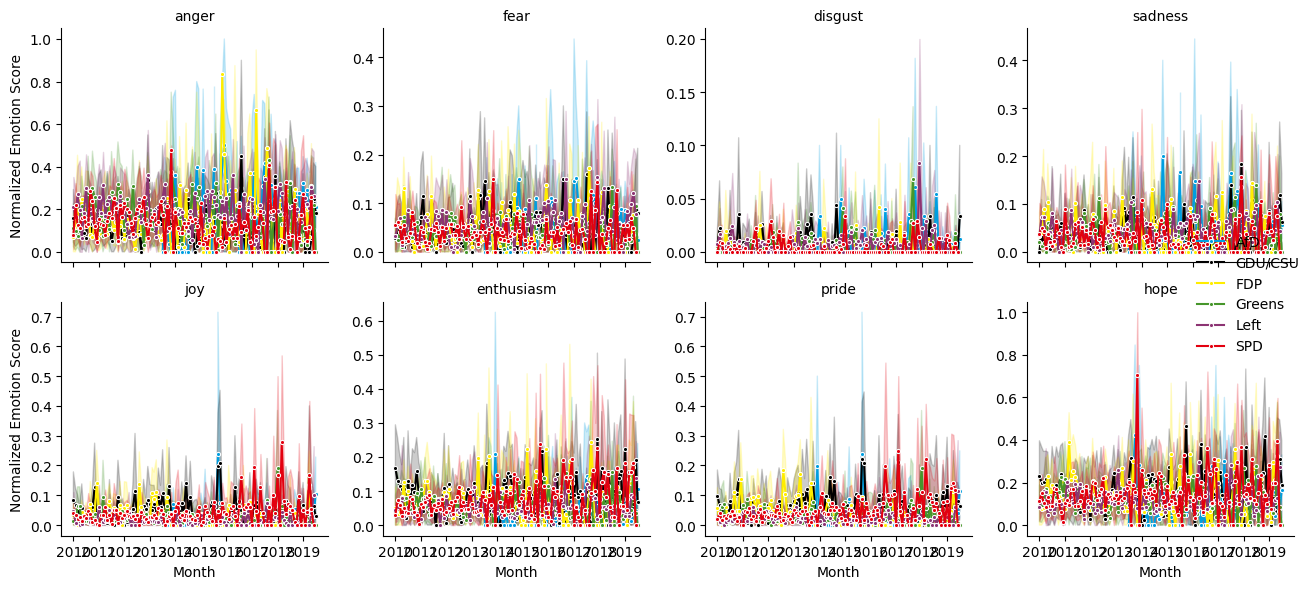

In [ ]:
## arrange plots

# Make sure your month column is datetime
df_clean['month'] = pd.to_datetime(df_clean['date']).dt.to_period('M').dt.to_timestamp()

# Melt normalized emotion columns
df_melted_month = df_clean.melt(
    id_vars=['month', 'party'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_month['emotion'] = df_melted_month['emotion'].str.replace('_norm', '')

# Plot with FacetGrid
g = sns.FacetGrid(
    df_melted_month,
    col="emotion",
    col_wrap=4,
    height=3,
    sharey=False
)
g.map_dataframe(
    sns.lineplot,
    x="month",
    y="value",
    hue="party",
    marker="o",
    linewidth=1.5,
    markersize=3,
    palette=party_colors
)
g.add_legend()
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Month", "Normalized Emotion Score")
plt.tight_layout()
plt.show()

-- *Line plot of each emotion by party over time (quarterly)*

In [ ]:
# create quarterly period
df_clean['quarter'] = pd.to_datetime(df_clean['date']).dt.to_period('Q').dt.start_time

# melt emotion columns
df_melted_quarter = df_clean.melt(
    id_vars=['quarter', 'party'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_quarter['emotion'] = df_melted_quarter['emotion'].str.replace('_norm', '')

# group by quarter, party, emotion
df_quarterly = df_melted_quarter.groupby(['quarter', 'party', 'emotion'])['value'].mean().reset_index()

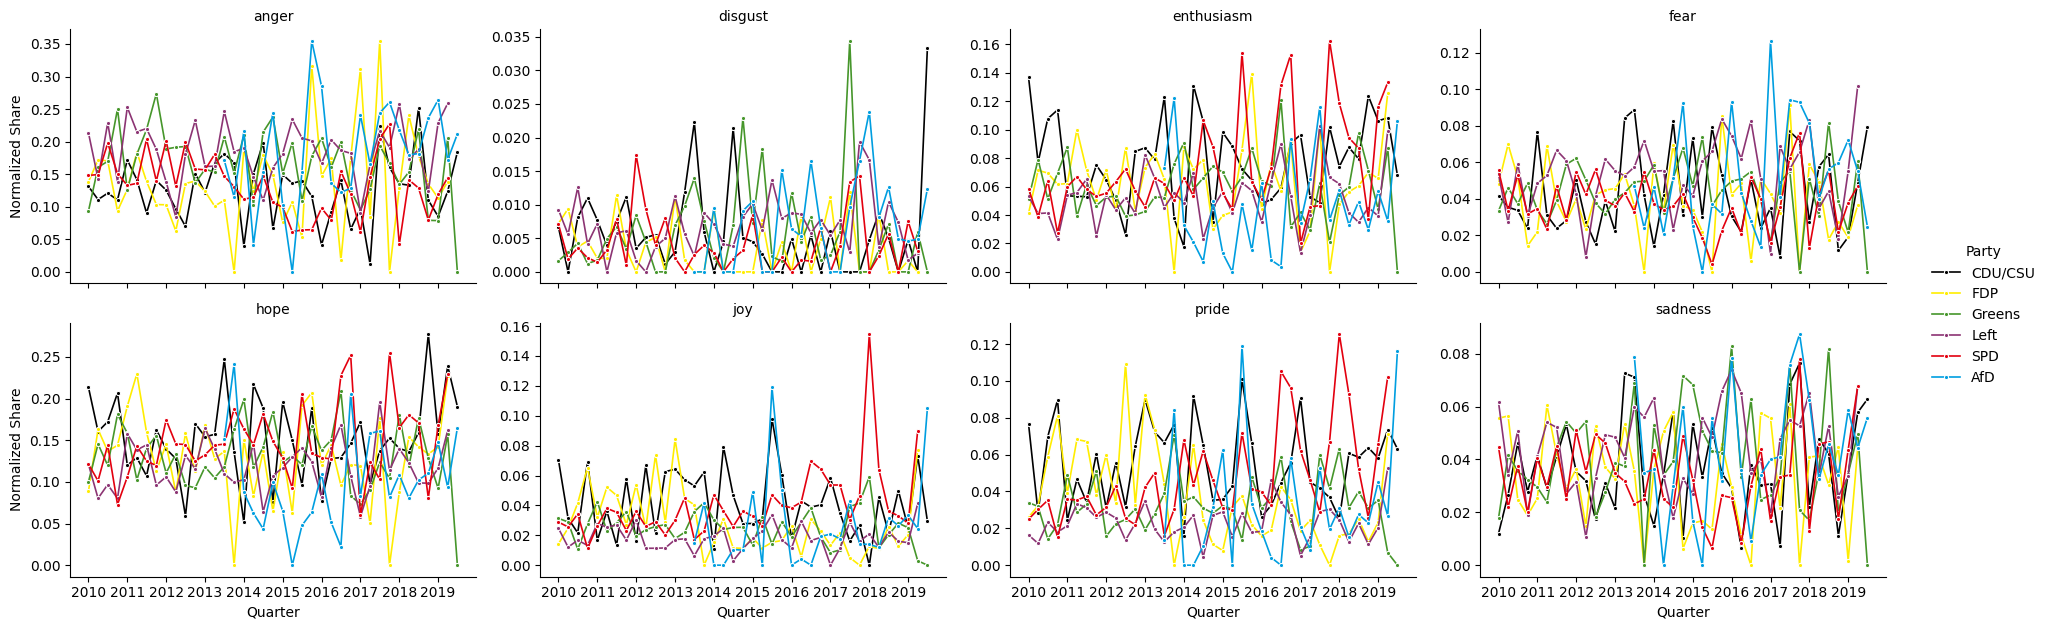

In [ ]:
# plot
g = sns.FacetGrid(
    df_quarterly,
    col="emotion",
    col_wrap=4,
    height=3.2,
    sharey=False,
    aspect=1.4
)
g.map_dataframe(
    sns.lineplot,
    x="quarter",
    y="value",
    hue="party",
    marker="o",
    linewidth=1.2,
    markersize=3,
    palette=party_colors
)
g.set_titles("{col_name}")
g.set_axis_labels("Quarter", "Normalized Share")
g.add_legend(title="Party", bbox_to_anchor=(1.01, 0.5), loc="center left")
plt.tight_layout()
plt.show()

<hr style="opacity: 0.25">

### Visualize results (normalized emotions)

-- *Distribution of each (normalized) emotion over time*

<hr style="opacity: 0.25">

### Run regressions

In [ ]:
# prepare df for regressions
df_reg = df_quarterly.pivot_table(index=['quarter', 'party'], columns='emotion', values='value').reset_index()

In [ ]:
# decide on dependent variables and add independent variables



In [ ]:
# run regression

# example: poll data as DV, emotions as IVs
model = smf.ols('XXXX ~ anger + joy + fear + disgust + sadness + enthusiasm + pride + hope', data=df_reg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  anger   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     42.81
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           4.05e-37
Time:                        15:21:06   Log-Likelihood:                 406.34
No. Observations:                 217   AIC:                            -796.7
Df Residuals:                     209   BIC:                            -769.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0496      0.009      5.437      0.0

<hr style="opacity: 0.25">

### Most discussed issues

-- *Look at most frequently discussed issues*

In [ ]:
# count how many press releases cover each issue
issue_counts = df_clean['issue_mono'].value_counts().reset_index()
issue_counts.columns = ['issue_mono', 'n_press_releases']

# preview the top issues
print(issue_counts.head(10))

   issue_mono  n_press_releases
0       191.0              1167
1         2.0               675
2        12.0               610
3         5.0               578
4       192.0               552
5        15.0               550
6         9.0               498
7         1.0               480
8         8.0               475
9         6.0               467


In [ ]:
# count number of press releases per party per issue
issue_party_counts = df_clean.groupby(['party', 'issue_mono']).size().reset_index(name='n_press_releases')

# get top N
top_issues_per_party = (
    issue_party_counts
    .sort_values(['party', 'n_press_releases'], ascending=[True, False])
    .groupby('party')
    .head(3)
    .reset_index(drop=True)
)

# show top issues by party
print(top_issues_per_party)

      party  issue_mono  n_press_releases
0       AfD         9.0               134
1       AfD       192.0                86
2       AfD         2.0                80
3   CDU/CSU       191.0               211
4   CDU/CSU         2.0               125
5   CDU/CSU        15.0               107
6       FDP       191.0               164
7       FDP         1.0               157
8       FDP        12.0               115
9    Greens       191.0               240
10   Greens         4.0               128
11   Greens         8.0               115
12     Left       191.0               274
13     Left         5.0               243
14     Left        12.0               183
15      SPD       191.0               215
16      SPD         6.0               180
17      SPD        15.0               169


In [ ]:
# filter to top N issues
top_issues = issue_counts['issue_mono'].head(7).tolist()

# Filter the dataset
df_top_issues = df_clean[df_clean['issue_mono'].isin(top_issues)].copy()

In [ ]:
# melt and prepare data for plotting

# Melt emotion columns
df_melted_issues = df_top_issues.melt(
    id_vars=['month_dt', 'party', 'issue_mono'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_issues['emotion'] = df_melted_issues['emotion'].str.replace('_norm', '')
df_melted_issues['emotion'] = df_melted_issues['emotion'].str.title()

-- *Immigration issue*

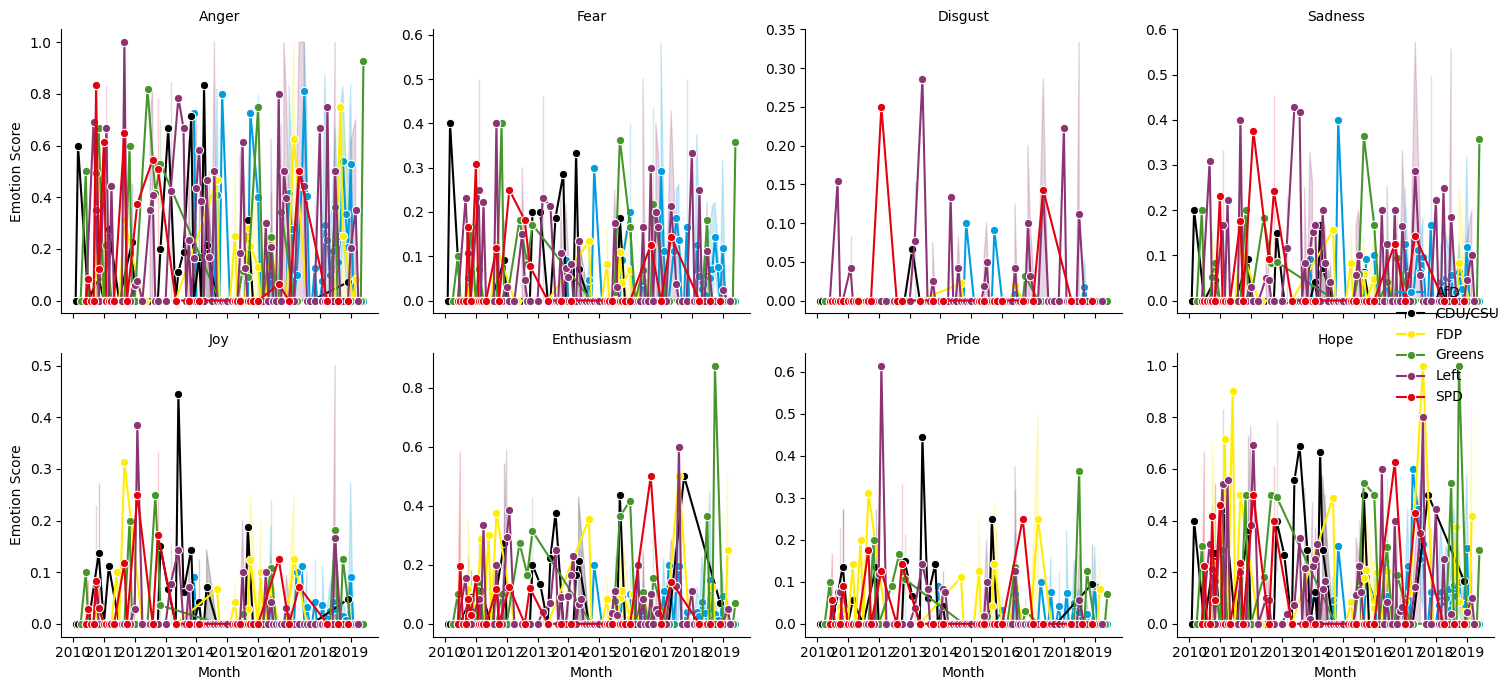

In [ ]:
# facet by emotion, color by party, top issue

issue_focus = top_issues[6]
df_focus = df_melted_issues[df_melted_issues['issue_mono'] == issue_focus]

g = sns.FacetGrid(df_focus, col="emotion", col_wrap=4, height=3.5, sharey=False)
g.map_dataframe(
    sns.lineplot,
    x="month_dt", y="value", hue="party",
    marker="o", #markersize=3,
    linewidth=1.5, palette=party_colors
)
g.set_titles(col_template="{col_name}")
g.add_legend()
g.set_axis_labels("Month", "Emotion Score")
plt.tight_layout()
plt.show()

-- *Line plot of each emotion by party over time (monthly)*

In [180]:
# convert date and create month column
df_clean['month'] = pd.to_datetime(df_clean['date']).dt.to_period('M').dt.to_timestamp()

# melt emotion columns
df_melted_month = df_clean.melt(
    id_vars=['month', 'party'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_month['emotion'] = df_melted_month['emotion'].str.replace('_norm', '')

# group by month, party, emotion
df_monthly = df_melted_month.groupby(['month', 'party', 'emotion'])['value'].mean().reset_index()

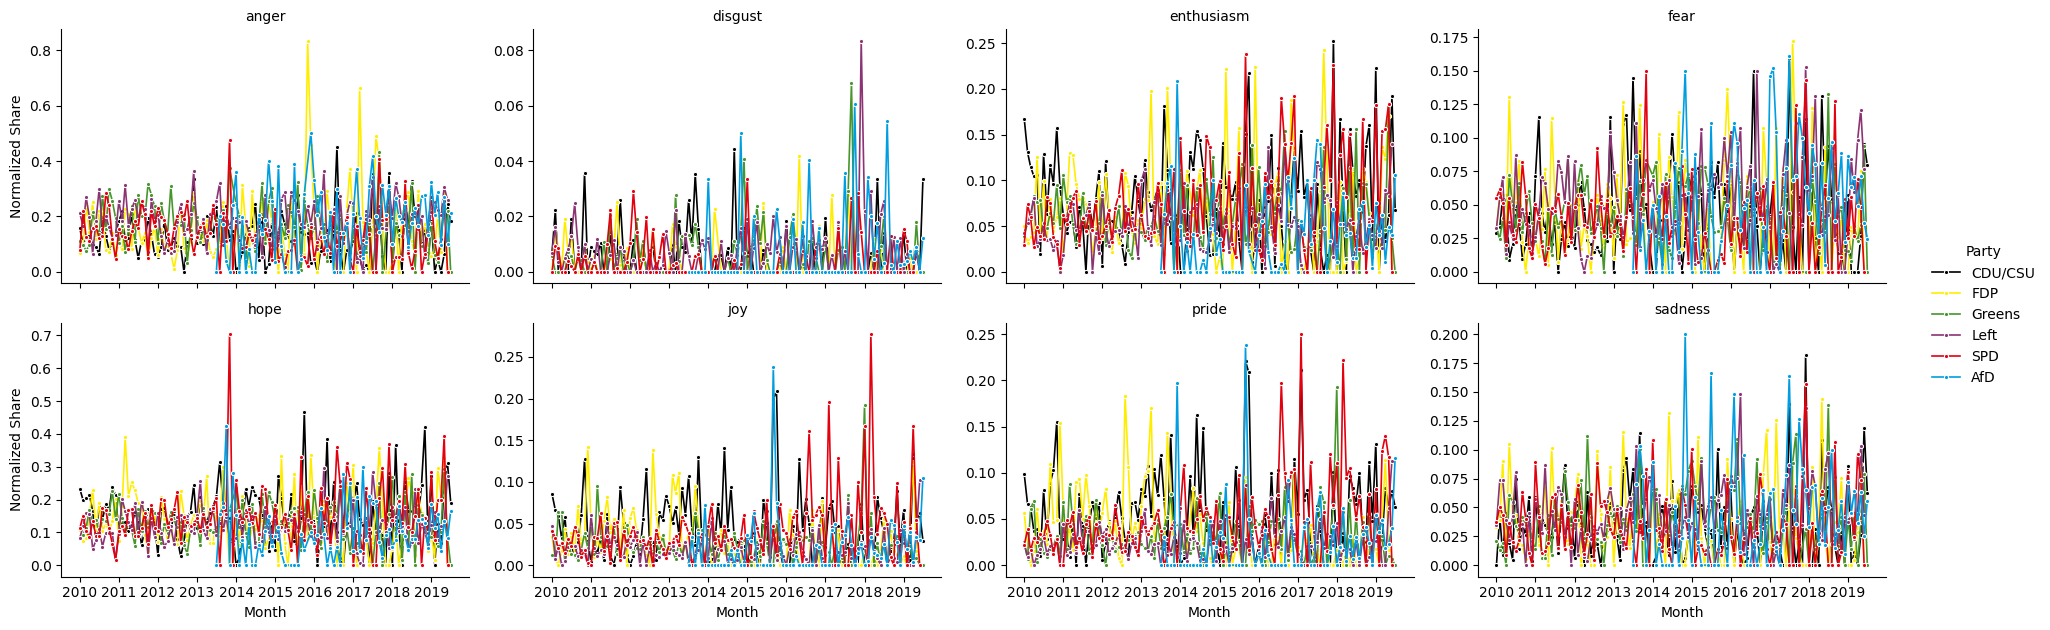

In [181]:
# faceted plot of 8 emotions
g = sns.FacetGrid(
    df_monthly,
    col="emotion",
    col_wrap=4,
    height=3.2,
    sharey=False,
    aspect=1.4
)
g.map_dataframe(
    sns.lineplot,
    x="month",
    y="value",
    hue="party",
    marker="o",
    linewidth=1.2,
    markersize=3,
    palette=party_colors
)
g.set_titles("{col_name}")
g.set_axis_labels("Month", "Normalized Share")
g.add_legend(title="Party", bbox_to_anchor=(1.01, 0.5), loc="center left")
plt.tight_layout()
plt.show()

-- *Line plot of each emotion by party over time (quarterly)*

In [171]:
# create quarterly period
df_clean['quarter'] = pd.to_datetime(df_clean['date']).dt.to_period('Q').dt.start_time

# melt emotion columns
df_melted_quarter = df_clean.melt(
    id_vars=['quarter', 'party'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_quarter['emotion'] = df_melted_quarter['emotion'].str.replace('_norm', '')

# group by quarter, party, emotion
df_quarterly = df_melted_quarter.groupby(['quarter', 'party', 'emotion'])['value'].mean().reset_index()

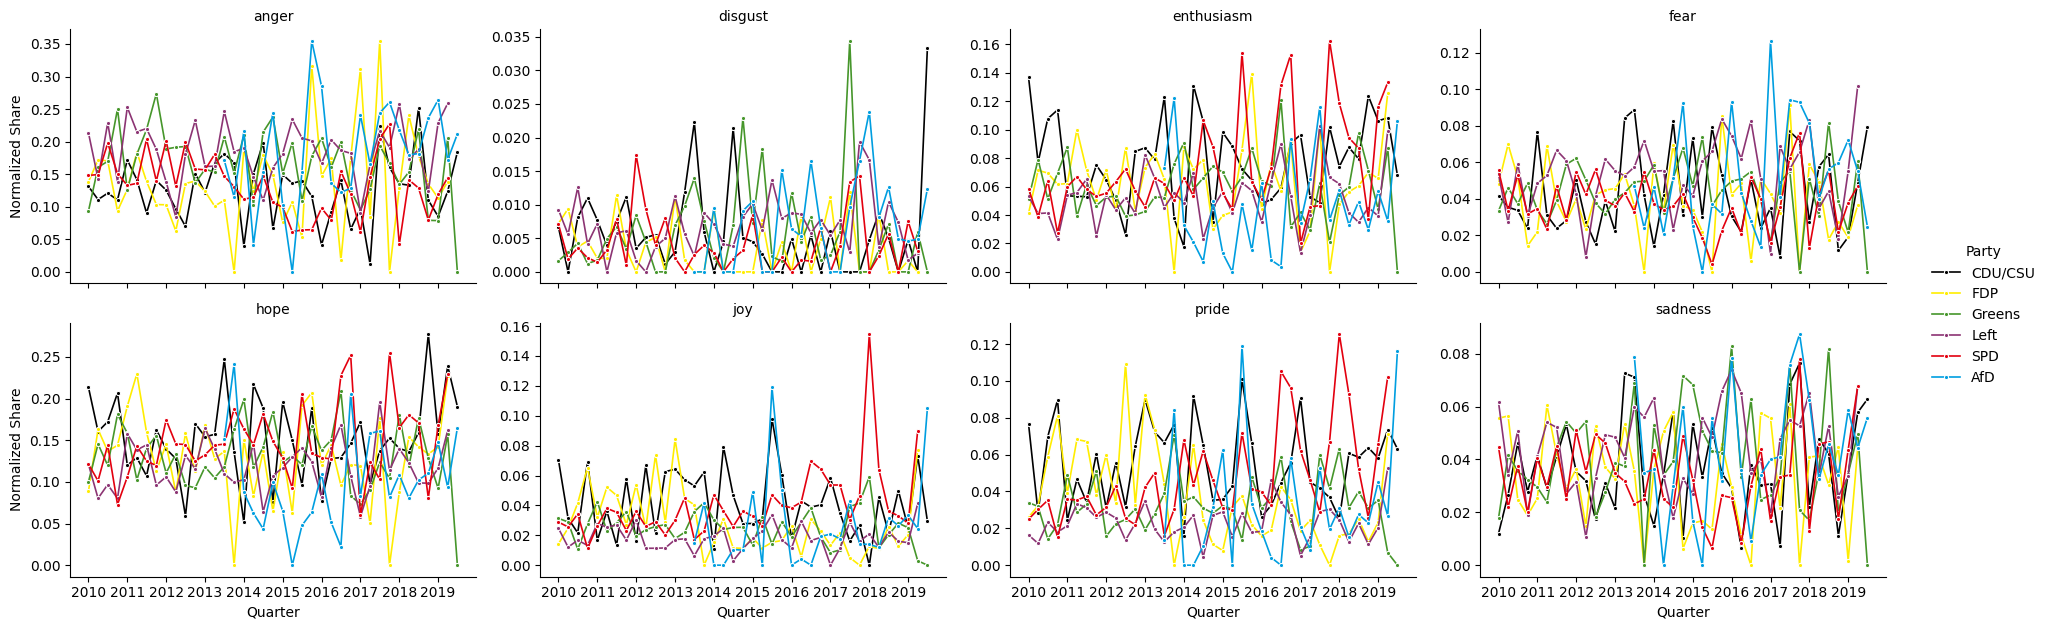

In [170]:
# plot
g = sns.FacetGrid(
    df_quarterly,
    col="emotion",
    col_wrap=4,
    height=3.2,
    sharey=False,
    aspect=1.4
)
g.map_dataframe(
    sns.lineplot,
    x="quarter",
    y="value",
    hue="party",
    marker="o",
    linewidth=1.2,
    markersize=3,
    palette=party_colors
)
g.set_titles("{col_name}")
g.set_axis_labels("Quarter", "Normalized Share")
g.add_legend(title="Party", bbox_to_anchor=(1.01, 0.5), loc="center left")
plt.tight_layout()
plt.show()

<hr style="opacity: 0.25">

### Visualize results (normalized emotions)

-- *Distribution of each (normalized) emotion over time*

In [175]:
# melt normalized emotion columns
emotion_cols_norm = [col + '_norm' for col in emotion_cols]

df_melted = df_clean.melt(
    id_vars=['month_dt'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted['emotion'] = df_melted['emotion'].str.replace('_norm', '')

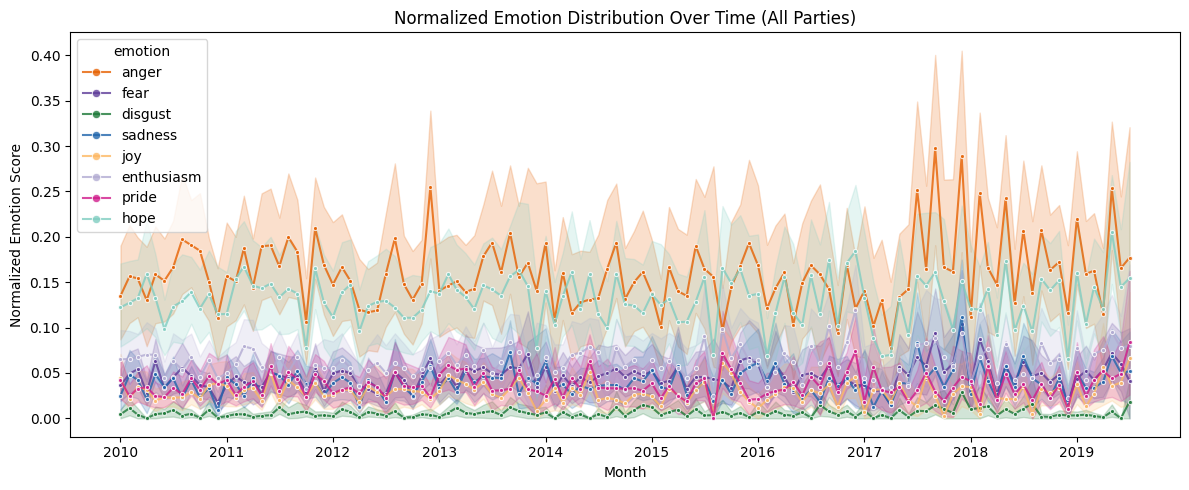

In [176]:
# plot
plt.figure(figsize=(12, 5))
lineplot = sns.lineplot(
    data=df_melted,
    x='month_dt',
    y='value',
    hue='emotion',
    palette=emotion_colors,
    marker='o',
    alpha=0.8)

# set marker size within lines
for line in lineplot.get_lines():
    line.set_markersize(3)

plt.title('Normalized Emotion Distribution Over Time (All Parties)')
plt.xlabel('Month')
plt.ylabel('Normalized Emotion Score')
plt.tight_layout()
plt.show()

<hr style="opacity: 0.25">

### Run regressions

In [95]:
# prepare df for regressions
df_reg = df_quarterly.pivot_table(index=['quarter', 'party'], columns='emotion', values='value').reset_index()

In [96]:
# decide on dependent variables and add independent variables



In [97]:
# run regression

# example: poll data as DV, emotions as IVs
model = smf.ols('XXXX ~ anger + joy + fear + disgust + sadness + enthusiasm + pride + hope', data=df_reg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  anger   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     42.81
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           4.05e-37
Time:                        15:21:06   Log-Likelihood:                 406.34
No. Observations:                 217   AIC:                            -796.7
Df Residuals:                     209   BIC:                            -769.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0496      0.009      5.437      0.0

<hr style="opacity: 0.25">

### Most discussed issues

-- *Look at most frequently discussed issues*

In [98]:
# count how many press releases cover each issue
issue_counts = df_clean['issue_mono'].value_counts().reset_index()
issue_counts.columns = ['issue_mono', 'n_press_releases']

# preview the top issues
print(issue_counts.head(10))

   issue_mono  n_press_releases
0       191.0              1167
1         2.0               675
2        12.0               610
3         5.0               578
4       192.0               552
5        15.0               550
6         9.0               498
7         1.0               480
8         8.0               475
9         6.0               467


In [99]:
# count number of press releases per party per issue
issue_party_counts = df_clean.groupby(['party', 'issue_mono']).size().reset_index(name='n_press_releases')

# get top N
top_issues_per_party = (
    issue_party_counts
    .sort_values(['party', 'n_press_releases'], ascending=[True, False])
    .groupby('party')
    .head(3)
    .reset_index(drop=True)
)

# show top issues by party
print(top_issues_per_party)

      party  issue_mono  n_press_releases
0       AfD         9.0               134
1       AfD       192.0                86
2       AfD         2.0                80
3   CDU/CSU       191.0               211
4   CDU/CSU         2.0               125
5   CDU/CSU        15.0               107
6       FDP       191.0               164
7       FDP         1.0               157
8       FDP        12.0               115
9    Greens       191.0               240
10   Greens         4.0               128
11   Greens         8.0               115
12     Left       191.0               274
13     Left         5.0               243
14     Left        12.0               183
15      SPD       191.0               215
16      SPD         6.0               180
17      SPD        15.0               169


In [100]:
# filter to top N issues
top_issues = issue_counts['issue_mono'].head(7).tolist()

# Filter the dataset
df_top_issues = df_clean[df_clean['issue_mono'].isin(top_issues)].copy()

In [182]:
# melt and prepare data for plotting

# Melt emotion columns
df_melted_issues = df_top_issues.melt(
    id_vars=['month_dt', 'party', 'issue_mono'],
    value_vars=emotion_cols_norm,
    var_name='emotion',
    value_name='value'
)
df_melted_issues['emotion'] = df_melted_issues['emotion'].str.replace('_norm', '')
df_melted_issues['emotion'] = df_melted_issues['emotion'].str.title()

-- *Immigration issue*

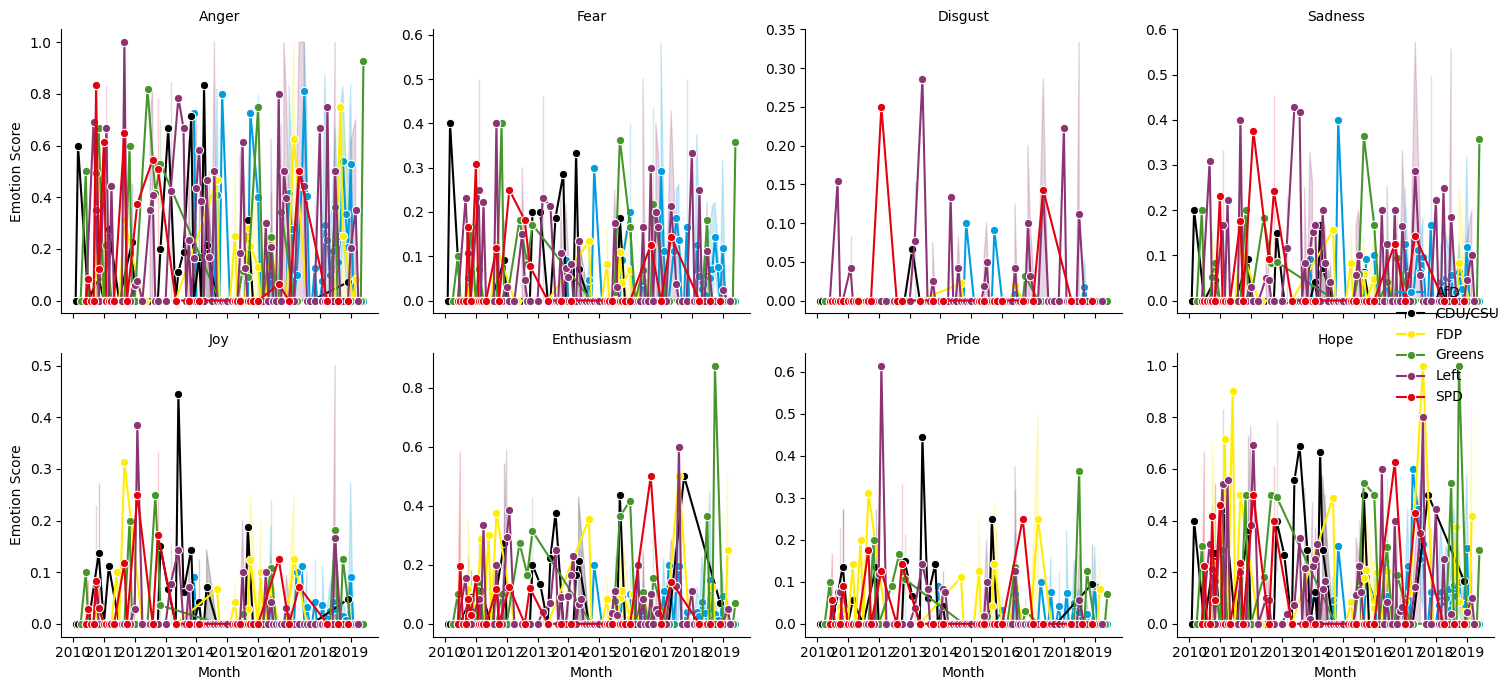

In [102]:
# facet by emotion, color by party, top issue

issue_focus = top_issues[6]
df_focus = df_melted_issues[df_melted_issues['issue_mono'] == issue_focus]

g = sns.FacetGrid(df_focus, col="emotion", col_wrap=4, height=3.5, sharey=False)
g.map_dataframe(
    sns.lineplot,
    x="month_dt", y="value", hue="party",
    marker="o", #markersize=3,
    linewidth=1.5, palette=party_colors
)
g.set_titles(col_template="{col_name}")
g.add_legend()
g.set_axis_labels("Month", "Emotion Score")
plt.tight_layout()
plt.show()